In [1]:
import numpy as np
import cv2
import os 
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
import random 
from sklearn.model_selection import train_test_split

from sklearn import svm, metrics

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

In [2]:
#import Excelsheet
path = r"C:\Users\khaldoun\Desktop\final project\input\5k_diagnosis"
df = pd.read_csv(os.path.join(path, "full_df.csv"))
#df = df.head(200)
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [3]:
file_names = []
labels = []

for text, label, file_name in zip(df["Left-Diagnostic Keywords"], df["C"], df["Left-Fundus"]):
    
    if(("cataract" in text) and (label == 1)):
        file_names.append(file_name)
        labels.append(1)
    
    elif(("normal fundus" in text) and (label == 0)):
        file_names.append(file_name)
        labels.append(0)
        
for text, label, file_name in zip(df["Right-Diagnostic Keywords"], df["C"], df["Right-Fundus"]):
    
    if(("cataract" in text) and (label == 1)):
        file_names.append(file_name)
        labels.append(1)
    
    elif(("normal fundus" in text) and (label == 0)):
        file_names.append(file_name)
        labels.append(0)

print(len(file_names), len(labels))
    

6162 6162


In [4]:
#define Image size 
ROW = 224
COL = 224

In [5]:
#load images into numpy array and resize them 
image_data = []
for idx, image_name in enumerate(file_names):
    
    img = cv2.imread(os.path.join(path,"preprocessed_images",image_name))
    try:
        img = cv2.resize(img, (ROW, COL))
        image_data.append(img)
    except:
        del labels[idx]
    
image_data = np.array(image_data)

print(image_data.shape)

(6078, 224, 224, 3)


In [6]:

#prepare training data by sampling 
temp = []
for idx, label in enumerate(labels):
    if label == 0:
        temp.append(idx)

temp = sample(temp, len([label for label in labels if label == 1]))

X_data = []
y_data = []

for idx in temp:
    X_data.append(image_data[idx])
    y_data.append(labels[idx])

temp = []
for idx, label in enumerate(labels):
    if label == 1:
        temp.append(idx)
        
for idx in temp:
    X_data.append(image_data[idx])
    y_data.append(labels[idx])

X_data = np.array(X_data)
y_data = np.array(y_data)


print(X_data.shape, y_data.shape)



(1178, 224, 224, 3) (1178,)


0


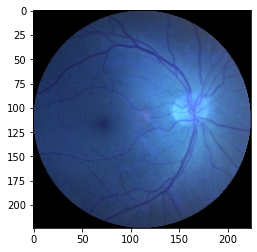

1


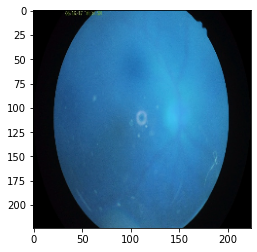

0


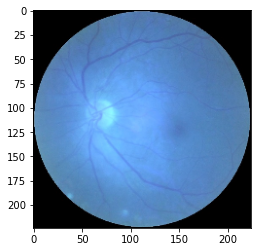

1


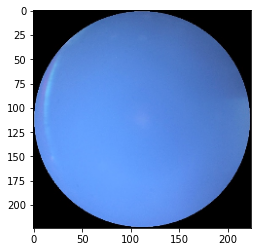

0


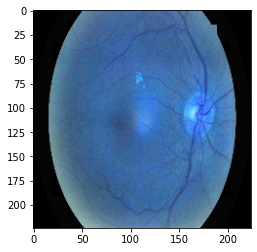

0


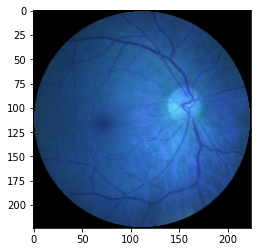

1


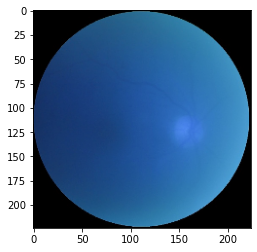

1


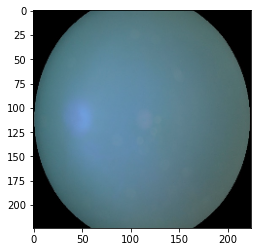

1


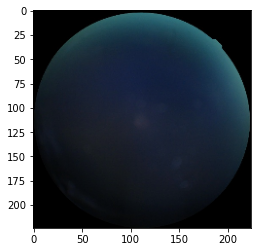

1


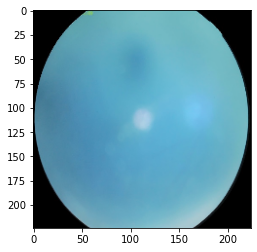

0


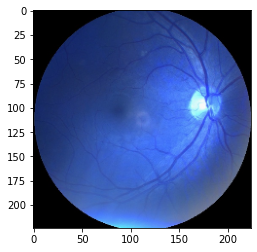

0


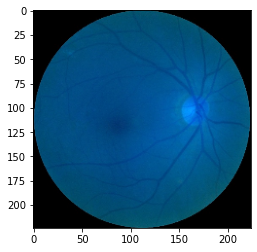

0


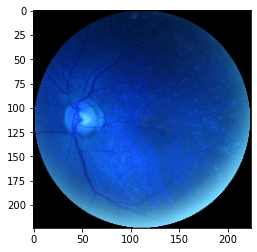

1


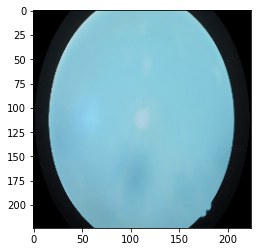

0


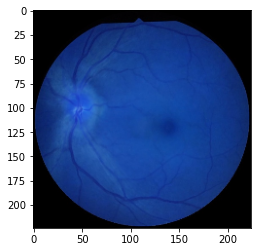

0


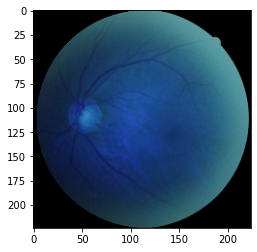

0


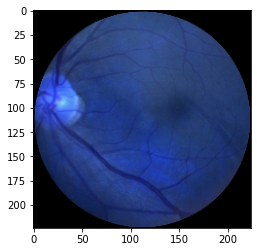

1


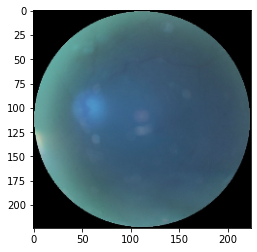

0


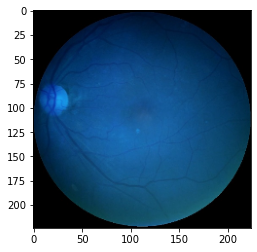

1


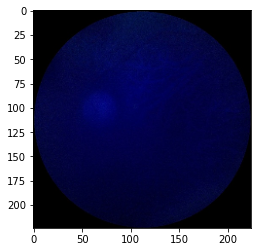

In [7]:
#display some images 
for i in range(20):
    n = random. randint(0,len(y_data))
    print(y_data[n])
    plt.imshow(X_data[n])
    plt.show()
    


In [8]:
len(y_data)

X_data = X_data.reshape((len(y_data), -1))

print(X_data.shape)

(1178, 150528)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle = True, random_state = 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(942, 150528) (942,)
(236, 150528) (236,)


#  Train SVM 

In [19]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

In [20]:
classifier.fit(X_train,y_train)

SVC(gamma=0.001)

In [21]:
# Now predict the value of test data:
expected = y_test
predicted = classifier.predict(X_test)

In [22]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       128
           1       0.97      0.68      0.80       108

    accuracy                           0.84       236
   macro avg       0.88      0.83      0.83       236
weighted avg       0.87      0.84      0.84       236


Confusion matrix:
[[126   2]
 [ 35  73]]


# Train KNN

In [23]:
classifier = KNeighborsClassifier(5)

In [24]:
classifier.fit(X_train,y_train)

# Now predict the value of the digit on the second half:
expected = y_test
predicted = classifier.predict(X_test)

In [25]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.82      0.53      0.64       128
           1       0.61      0.86      0.71       108

    accuracy                           0.68       236
   macro avg       0.71      0.70      0.68       236
weighted avg       0.72      0.68      0.68       236


Confusion matrix:
[[68 60]
 [15 93]]


# Train RandomForest Classifier

In [26]:
classifier = RandomForestClassifier()

In [27]:
classifier.fit(X_train,y_train)

# Now predict the value of the digit on the second half:
expected = y_test
predicted = classifier.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.90      0.78      0.84       128
           1       0.78      0.90      0.83       108

    accuracy                           0.83       236
   macro avg       0.84      0.84      0.83       236
weighted avg       0.84      0.83      0.83       236


Confusion matrix:
[[100  28]
 [ 11  97]]
